In [2]:
%matplotlib widget
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def imshow(frame, dpi=160):
  im_data = cv.cvtColor(frame, cv.COLOR_BGR2RGB)
  height, width, depth = im_data.shape

  # What size does the figure need to be in inches to fit the image?
  figsize = width / float(dpi), height / float(dpi)

  # Create a figure of the right size with one axes that takes up the full figure
  fig = plt.figure(figsize=figsize)
  ax = fig.add_axes([0, 0, 1, 1])

  # Hide spines, ticks, etc.
  ax.axis('off')

  # Display the image.
  ax.imshow(im_data, cmap='gray')

  plt.show()

In [13]:
test_image = cv.imread('data/labeled/fish_ring/2022-08-11T09:41:16.355908.png')
img = cv.inRange(test_image, (190, 190, 190), (255, 255, 255))
img = img[220:1000, 400:1100]

In [14]:
circle = np.array([np.cos(np.arange(0, 2*np.pi, 2*np.pi/100)), np.sin(np.arange(0, 2*np.pi, 2*np.pi/100))])
circle = circle.swapaxes(0, 1)

(372.9552307128906, 366.7541809082031)
[772.95523071 586.75418091] (291.4342346191406, 292.6133117675781) 177.8852996826172


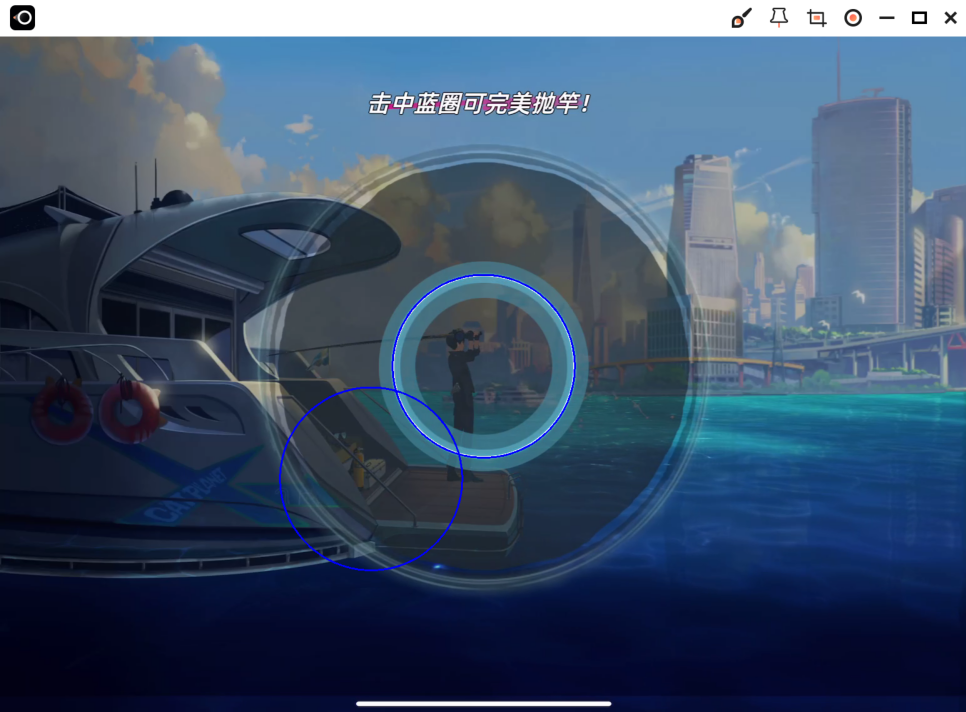

In [18]:
contours, _ = cv.findContours(img, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
best = min(contours,
           key=lambda c: cv.matchShapes(circle, c, cv.CONTOURS_MATCH_I1, 0))
contours = cv.convexHull(best)
ellipse = cv.fitEllipse(contours)
center, size, angle = ellipse
print(center)
center = np.array(center) + (400, 220)
print(center, size, angle)
cv.ellipse(test_image, (center, size, angle), (255, 0, 0), 2)
imshow(test_image)
